In [1]:
import pandas as pd
import plotly.express as px

In [2]:
VAAs = [
    'StemWijzer',
    'Kieskompas What2Vote',
    'Smartvote',
    'Wahl-O-Mat',
    'Aftonbladets valkompass',
    'SVT Nyheters valkompass',
    'HS Vaalikone',    
]
VAAs_broken = [
    'StemWijzer',
    'Kieskompas<br>What2Vote',
    'Smartvote',
    'Wahl-O-Mat',
    'Aftonbladets<br>valkompass',
    'SVT Nyheters<br>valkompass',
    'HS Vaalikone',    
]
requirement_order=[
    'Human agency and oversight',
    'Technical robustness and safety',
    'Privacy and data governance',
    'Transparency',
    'Diversity, non-discrimination and fairness',
    'Societal and environmental well-being',
    'Accountability']


In [3]:
df = pd.read_table('requirement_fulfillment.csv',
                 sep=';', decimal=",",
                 engine='python',
                 index_col=['Requirement', 'Sub-requirement nr'],
                 usecols=['Requirement','Sub-requirement nr','Max']+[v+ " Points" for v in VAAs])

In [4]:
df.rename(columns = lambda x:  x[:-7] if x[-7:]== " Points" else x, inplace=True)
df.rename(index={i:f"R{i}" for i,j in enumerate(requirement_order, 1)}, level=0, inplace=True)

In [5]:
df_pct = df.apply(lambda x: x/x['Max'], axis=1)

In [6]:
df_pct.groupby(level=0).agg(['mean','std']).loc[:, VAAs].style.format(formatter="{:.2f}")

In [7]:
data = df_pct.groupby(level=0).mean().loc[:, VAAs].stack().reset_index()
data.columns=['Requirement', 'Voting Advice Application', 'Compliance']

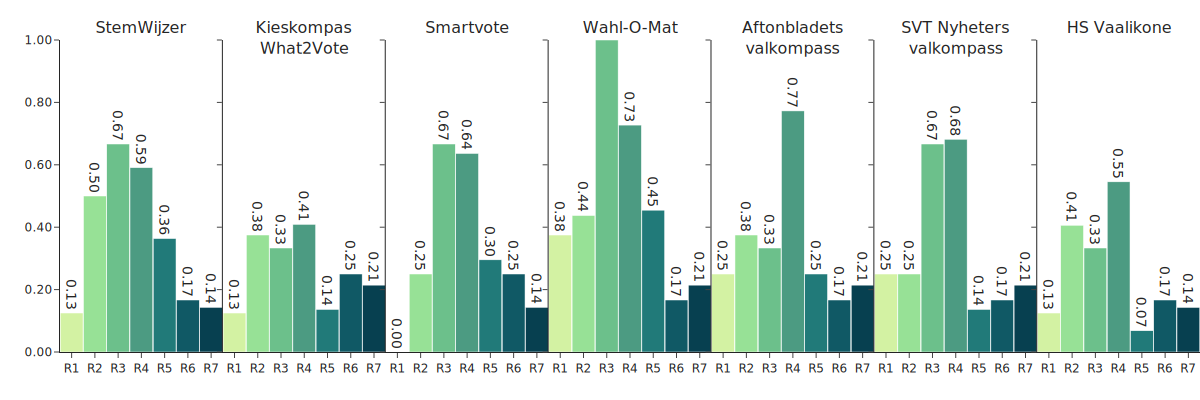

In [8]:
fig = px.bar(data, x="Requirement", y="Compliance", text="Compliance", 
             facet_col="Voting Advice Application", color="Requirement",
             height=300, width=800, 
             facet_col_spacing=0.0001,
             color_discrete_sequence=px.colors.sequential.Emrld)
fig.update_traces(textangle=90, cliponaxis=True, texttemplate='%{text:.2f}', textposition='outside')
fig.update_xaxes(matches='y', title="")
fig.update_yaxes(matches='y', title="")

for i,v in enumerate(VAAs_broken):
    fig.layout.annotations[i].text = v
    fig.layout.annotations[i].font.size = 16
    fig.layout.annotations[i].yanchor = "top"
    fig.layout.annotations[i].yshift = 25


fig.update_layout(
    bargap=0.02,
    template='simple_white',
    height=400, width=1200, 
    showlegend = False,
    margin=dict(l=0, r=0, t=40, b=0),
    yaxis_tickformat = '.2f',
    yaxis_range=[0, 1],
    uniformtext_minsize=14, uniformtext_mode='show',
    coloraxis_showscale=False)

fig.show(renderer="svg")
fig.write_image(f'results.eps')